In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importing data
data = pd.read_csv('ecommerce_data.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# shape of data
data.shape

(541909, 8)

In [4]:
# getting the UK customer segments only
mydata = data[data.Country == 'United Kingdom']
mydata.Country.unique()

array(['United Kingdom'], dtype=object)

In [5]:
# shape of UK data
mydata.shape

(495478, 8)

In [6]:
# checking the UK customer records that has NANs
mydata.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [7]:
# dropping the rows that has null Customer IDs
mydata = mydata.dropna(subset=['CustomerID'], how='all')
mydata.shape

(361878, 8)

In [8]:
# number of orders
mydata.InvoiceNo.nunique()

19857

In [9]:
# number of unique products
mydata.StockCode.nunique()

3661

In [10]:
# number of unique customers
mydata.CustomerID.nunique()

3950

In [11]:
# through descriptions we see that there are Quantities that has minus value (probably return/discount)
mydata[['UnitPrice','Quantity']].describe().T

,count,mean,std,min,25%,50%,75%,max
UnitPrice,361878.0,3.256007,70.654731,0.0,1.25,1.95,3.75,38970.0
Quantity,361878.0,11.077029,263.129266,-80995.0,2.00,4.00,12.00,80995.0


In [12]:
# showing data with <0 Quantity
mydata[mydata['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
# getting the data with >0 Quantities only
mydata = mydata[~mydata['Quantity']<0]

# dropping duplicate Invoices
mydata = mydata.drop_duplicates(subset=['InvoiceNo'], keep='first')

mydata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3,12/1/2010 8:35,5.95,13047.0,United Kingdom


In [14]:
# frequency per CustomerID
n_orders = mydata.groupby('CustomerID')['InvoiceNo'].nunique()
n_orders

CustomerID
12346.0      1
12747.0     11
12748.0    210
12749.0      5
12820.0      4
          ... 
18280.0      1
18281.0      1
18282.0      2
18283.0     16
18287.0      3
Name: InvoiceNo, Length: 3921, dtype: int64

In [15]:
# getting the CustomerID that buys more than 1x
np.sum(n_orders>1) / mydata['CustomerID'].nunique()

0.655445039530732

### - 65,5% of customers buy more than once

In [16]:
# getting the CustomerID that buys more than 5x
np.sum(n_orders>5) / mydata['CustomerID'].nunique()

0.20173425146646265

### - 20,1% of customers buy more than five times

In [17]:
# showing the CustomerIDs that buys more than 10x
n_orders[n_orders>10]

CustomerID
12747.0     11
12748.0    210
12839.0     14
12841.0     25
12877.0     12
          ... 
18225.0     12
18226.0     11
18229.0     20
18241.0     17
18283.0     16
Name: InvoiceNo, Length: 309, dtype: int64

In [46]:
# getting the CustomerID that buys more than 5x
np.sum(n_orders>10) / mydata['CustomerID'].nunique()

0.07880642693190512

### - 7,8% of customers buy more than ten times

[Text(0.5, 1.0, 'Number of Orders Distribution'),
 Text(0.5, 0, 'number of orders'),
 Text(0, 0.5, 'number of CustomerID')]

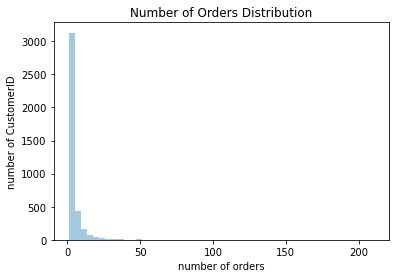

In [18]:
# displaying number of orders distribution
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Number of Orders Distribution', 
      xlabel='number of orders',
      ylabel= 'number of CustomerID')

In [19]:
# creating new column in datetime type & checking in info
import datetime as dt
mydata['Date'] = pd.to_datetime(mydata.InvoiceDate)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16649 entries, 0 to 541890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    16649 non-null  object        
 1   StockCode    16649 non-null  object        
 2   Description  16649 non-null  object        
 3   Quantity     16649 non-null  int64         
 4   InvoiceDate  16649 non-null  object        
 5   UnitPrice    16649 non-null  float64       
 6   CustomerID   16649 non-null  float64       
 7   Country      16649 non-null  object        
 8   Date         16649 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.3+ MB


In [20]:
# getting the period of buying for transaction
mydata['Period'] = mydata['Date'].dt.to_period('M')
mydata['Period']

0         2010-12
7         2010-12
9         2010-12
21        2010-12
25        2010-12
           ...   
541863    2011-12
541865    2011-12
541867    2011-12
541869    2011-12
541890    2011-12
Name: Period, Length: 16649, dtype: period[M]

In [21]:
# getting the earliest period of buying for each CustomerID
mydata['Cohort'] = mydata.groupby('CustomerID')['Date'].transform('min').dt.to_period('M')
mydata['Cohort']

0         2010-12
7         2010-12
9         2010-12
21        2010-12
25        2010-12
           ...   
541863    2010-12
541865    2010-12
541867    2010-12
541869    2011-05
541890    2010-12
Name: Cohort, Length: 16649, dtype: period[M]

In [22]:
# getting data sample
mydata.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Period,Cohort
234766,557601,47566,PARTY BUNTING,4,6/21/2011 11:47,4.95,18252.0,United Kingdom,2011-06-21 11:47:00,2011-06,2011-06
154401,549909,23053,RECYCLED ACAPULCO MAT PINK,2,4/12/2011 16:43,8.25,15777.0,United Kingdom,2011-04-12 16:43:00,2011-04,2010-12
374542,569382,M,Manual,1,10/3/2011 16:44,3155.95,15502.0,United Kingdom,2011-10-03 16:44:00,2011-10,2010-12
171959,551507,21422,PORCELAIN ROSE SMALL,16,4/28/2011 18:11,0.85,18272.0,United Kingdom,2011-04-28 18:11:00,2011-04,2011-04
148624,549248,20803,SMALL PINK GLASS SUNDAE DISH,36,4/7/2011 12:04,0.39,13892.0,United Kingdom,2011-04-07 12:04:00,2011-04,2011-04
408315,571935,21485,RETROSPOT HEART HOT WATER BOTTLE,3,10/20/2011 8:41,4.95,13890.0,United Kingdom,2011-10-20 08:41:00,2011-10,2010-12
175249,551897,22060,LARGE CAKE STAND HANGING HEARTS,8,5/5/2011 10:31,3.95,13711.0,United Kingdom,2011-05-05 10:31:00,2011-05,2011-05
517977,580105,23570,TRADITIONAL PICK UP STICKS GAME,24,12/1/2011 15:24,1.25,17675.0,United Kingdom,2011-12-01 15:24:00,2011-12,2010-12
225537,556718,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,660,6/14/2011 11:02,2.75,16013.0,United Kingdom,2011-06-14 11:02:00,2011-06,2010-12
172218,551525,23201,JUMBO BAG ALPHABET,20,5/1/2011 12:37,2.08,14667.0,United Kingdom,2011-05-01 12:37:00,2011-05,2010-12


In [23]:
# Cohort & Period view
pd.set_option('display.max_rows', None)
mydata.groupby(['Cohort','Period']).agg(n_customers=('CustomerID','nunique'))

n_customers
Cohort  Period              
2010-12 2010-12          815
        2011-01          289
        2011-02          263
        2011-03          304
        2011-04          293
        2011-05          323
        2011-06          291
        2011-07          278
        2011-08          289
        2011-09          325
        2011-10          299
        2011-11          405
        2011-12          218
2011-01 2011-01          358
        2011-02           76
        2011-03           93
        2011-04           84
        2011-05          119
        2011-06           99
        2011-07           90
        2011-08           87
        2011-09          108
        2011-10          117
        2011-11          127
        2011-12           43
2011-02 2011-02          340
        2011-03           64
        2011-04           66
        2011-05           97
        2011-06           98
        2011-07           86
        2011-08           87
        2011-09           96
        2011-10           90
        2011-11          104
        2011-12           25
2011-03 2011-03          419
        2011-04           64
        2011-05          109
        2011-06           83
        2011-07           94
        2011-08           69
        2011-09          111
        2011-10           96
        2011-11          119
        2011-12           38
2011-04 2011-04          277
        2011-05           58
        2011-06           56
        2011-07           60
        2011-08           56
        2011-09           61
        2011-10           61
        2011-11           73
        2011-12           20
2011-05 2011-05          256
        2011-06           48
        2011-07           44
        2011-08           44
        2011-09           53
        2011-10           58
        2011-11           68
        2011-12           23
2011-06 2011-06          214
        2011-07           38
        2011-08           31
        2011-09           51
        2011-10           51
        2011-11           69
        2011-12           21
2011-07 2011-07          169
        2011-08           30
        2011-09           33
        2011-10           39
        2011-11           47
        2011-12           18
2011-08 2011-08          141
        2011-09           32
        2011-10           32
        2011-11           34
        2011-12           17
2011-09 2011-09          276
        2011-10           63
        2011-11           83
        2011-12           32
2011-10 2011-10          324
        2011-11           79
        2011-12           36
2011-11 2011-11          298
        2011-12           35
2011-12 2011-12           34

In [24]:
# getting period number & its number of unique customers per period
from operator import attrgetter
mycohort = mydata.groupby(['Cohort','Period']).agg(UniqueCustomer=('CustomerID','nunique')).reset_index(drop=False)
mycohort['PeriodNumber'] = (mycohort.Period - mycohort.Cohort).apply(attrgetter('n'))
mycohort.head()

,Cohort,Period,UniqueCustomer,PeriodNumber
0,2010-12,2010-12,815,0
1,2010-12,2011-01,289,1
2,2010-12,2011-02,263,2
3,2010-12,2011-03,304,3
4,2010-12,2011-04,293,4


In [25]:
# creating a pivot table to show case cohort, its period number, and its number of unique customers per period
mypivot = mycohort.pivot_table(index='Cohort',columns='PeriodNumber',values='UniqueCustomer')
mypivot.head()

PeriodNumber,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,815.0,289.0,263.0,304.0,293.0,323.0,291.0,278.0,289.0,325.0,299.0,405.0,218.0
2011-01,358.0,76.0,93.0,84.0,119.0,99.0,90.0,87.0,108.0,117.0,127.0,43.0,NaN
2011-02,340.0,64.0,66.0,97.0,98.0,86.0,87.0,96.0,90.0,104.0,25.0,NaN,NaN
2011-03,419.0,64.0,109.0,83.0,94.0,69.0,111.0,96.0,119.0,38.0,NaN,NaN,NaN
2011-04,277.0,58.0,56.0,60.0,56.0,61.0,61.0,73.0,20.0,NaN,NaN,NaN,NaN


In [100]:
# number of CustomerID in each cohort
cohort_size = mypivot.iloc[:,0]
cohort_size

Cohort
2010-12    815.0
2011-01    358.0
2011-02    340.0
2011-03    419.0
2011-04    277.0
2011-05    256.0
2011-06    214.0
2011-07    169.0
2011-08    141.0
2011-09    276.0
2011-10    324.0
2011-11    298.0
2011-12     34.0
Freq: M, Name: 0, dtype: float64

In [103]:
# retention matrix per period
retention_matrix = mypivot.divide(cohort_size, axis = 0)
retention_matrix

PeriodNumber,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,1.0,0.354601,0.322699,0.373006,0.359509,0.396319,0.357055,0.341104,0.354601,0.398773,0.366871,0.496933,0.267485
2011-01,1.0,0.212291,0.259777,0.234637,0.332402,0.276536,0.251397,0.243017,0.301676,0.326816,0.354749,0.120112,NaN
2011-02,1.0,0.188235,0.194118,0.285294,0.288235,0.252941,0.255882,0.282353,0.264706,0.305882,0.073529,NaN,NaN
2011-03,1.0,0.152745,0.260143,0.198091,0.224344,0.164678,0.264916,0.229117,0.284010,0.090692,NaN,NaN,NaN
2011-04,1.0,0.209386,0.202166,0.216606,0.202166,0.220217,0.220217,0.263538,0.072202,NaN,NaN,NaN,NaN
2011-05,1.0,0.187500,0.171875,0.171875,0.207031,0.226562,0.265625,0.089844,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.177570,0.144860,0.238318,0.238318,0.322430,0.098131,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.177515,0.195266,0.230769,0.278107,0.106509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.226950,0.226950,0.241135,0.120567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


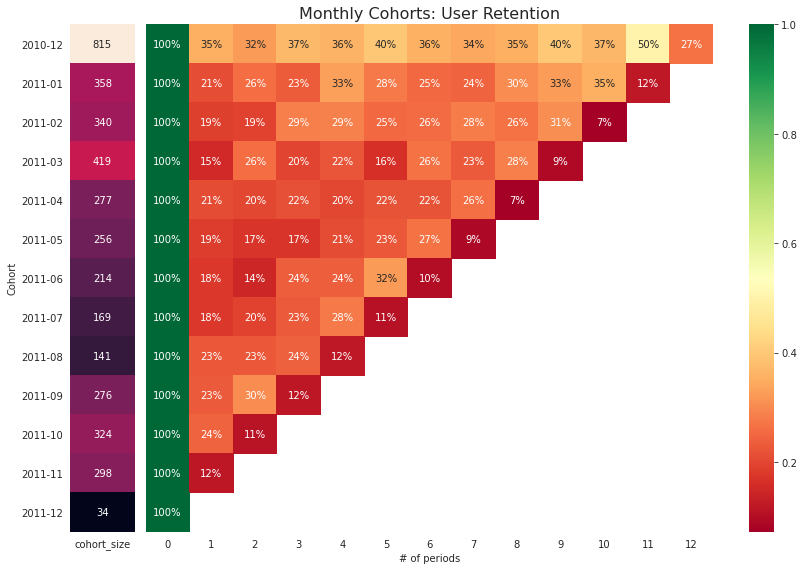

In [102]:
# heatmapping for retention matrix
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix, 
            mask=retention_matrix.isnull(), 
            annot=True, 
            fmt='.0%', 
            cmap='RdYlGn', 
            ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
          ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    sns.heatmap(cohort_size_df, 
            annot=True, 
            cbar=False, 
            fmt='g',  
            ax=ax[0])

    fig.tight_layout()